## Tables and Figures Rey (2016)

**Rey, S.J. (2016) “Space-time patterns of rank concordance: Local indicators of mobility association with applications to spatial income inequality dynamics.” *Annals of the Association of American Geographers.* DOI [10.1080/24694452.2016.1151336](http://dx.doi.org/10.1080/24694452.2016.1151336)**

This notebook reproduces the following

* Figures 1,2,4
* Tables 1-5

Note that the values and figures produced here were then incorporated into the main LaTeX file for submission. In some cases the column/row labels were editted prior to production. All numerical results, however, were as produced by this script.


In [1]:
import pandas as pd
import pysal as ps
import numpy as np

### Figure 1

In [2]:
t0= [[1,2,5,6], [3,4,7,8], [9,10,13,14], [11,12,15,16]]
df = pd.DataFrame(t0)
df

,0,1,2,3
0,1,2,5,6
1,3,4,7,8
2,9,10,13,14
3,11,12,15,16


In [3]:
regimes = [[0,0,1,1], [0,0,1,1], [2,2,3,3], [2,2,3,3]]
df = pd.DataFrame(regimes)
df

,0,1,2,3
0,0,0,1,1
1,0,0,1,1
2,2,2,3,3
3,2,2,3,3


In [4]:
t1= [[1,2,5,6], [3,4,7,8], [9,10,16,15], [11,12,14,13]]
df = pd.DataFrame(t1)
df

,0,1,2,3
0,1,2,5,6
1,3,4,7,8
2,9,10,16,15
3,11,12,14,13


In [5]:
x = np.array(t0).flatten()
y = np.array(t1).flatten()
w = ps.block_weights(np.array(regimes).flatten())

In [6]:
tau = ps.Tau(x,y)
tau.tau

0.90000000000000002

In [7]:
tau.concordant

114.0

In [8]:
16 * (15)/2.


120.0

In [9]:
4*3 / 2

6

In [10]:
108./120  # (c-d)/ (n*(n-1)/2)

0.9

In [11]:
np.random.seed(123456)
taus = ps.SpatialTau(x,y,w, permutations=999)
taus.concordant_spatial, taus.discordant_spatial, w.s0, taus.tau_spatial, taus.tau_p, taus.tau_spatial_psim

(18, 6, 48.0, 0.50000000000000011, 1.1595239720293317e-06, 0.001)

### Figure 2

In [12]:
t1= [[5,6, 1,2], [7,8, 3,4], [13,14, 9,10], [15,16, 11,12]]
df = pd.DataFrame(t1)
df

,0,1,2,3
0,5,6,1,2
1,7,8,3,4
2,13,14,9,10
3,15,16,11,12


In [13]:
y = np.array(t1).flatten()

In [14]:
taus = ps.SpatialTau(x,y,w,permutations=999)
taus.tau, taus.concordant_spatial, taus.discordant_spatial, w.s0, taus.tau_spatial, taus.tau_p, taus.tau_spatial_psim

(0.46666666666666667,
 24,
 0,
 48.0,
 1.0000000000000002,
 0.01169351220671508,
 0.0030000000000000001)

In [15]:

%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 11, 8.5

Populating the interactive namespace from numpy and matplotlib


/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [16]:
f = ps.open(ps.examples.get_path("mexico.csv"))
vnames = ["pcgdp%d"%dec for dec in range(1940, 2010, 10)]
y = np.transpose(np.array([f.by_col[v] for v in vnames]))
regime = np.array(f.by_col['esquivel99'])
w = ps.weights.block_weights(regime)
income = y[:]
state = np.array(f.by_col("State"))

## Spaghetti Plot

In [17]:
r = y / y.mean(axis=0)
order1940 = np.argsort(r[:,0])
order2000 = np.argsort(r[:,-1])

In [18]:
order1940

array([19, 11, 26,  4, 15, 14, 20, 28, 31,  3, 10, 23, 12, 17, 24, 29, 13,
       25,  7, 16, 27, 30,  6,  5, 18,  2,  0, 21,  9,  8, 22,  1])

In [19]:
order2000

array([ 4, 19, 31, 17, 28, 11, 15, 29, 12, 26, 24, 10, 20, 23, 14,  9, 30,
       16,  7, 13, 27, 25,  2, 21,  0,  6,  1,  5, 22,  3, 18,  8])

In [20]:
state[order1940[::-1]]

array(['Baja California', 'Quintana Roo', 'Distrito Federal', 'Durango',
       'Quertaro', 'Aguascalientes', 'Baja California Sur', 'Nuevo Leon',
       'Chihuahua', 'Coahuila', 'Yucatan', 'Tamaulipas', 'Morelos',
       'Colima', 'Sonora', 'Jalisco', 'Veracruz', 'Sinaloa', 'Nayarit',
       'Hidalgo', 'San Luis Potosi', 'Guanajuato', 'Campeche', 'Zacatecas',
       'Tlaxcala', 'Puebla', 'Mexico', 'Michoacan', 'Chiapas', 'Tabasco',
       'Guerrero', 'Oaxaca'], 
      dtype='|S19')

In [21]:
state[order2000[::-1]]

array(['Distrito Federal', 'Nuevo Leon', 'Campeche', 'Quintana Roo',
       'Chihuahua', 'Baja California', 'Coahuila', 'Aguascalientes',
       'Quertaro', 'Baja California Sur', 'Sonora', 'Tamaulipas',
       'Jalisco', 'Colima', 'Morelos', 'Yucatan', 'Durango', 'Mexico',
       'San Luis Potosi', 'Puebla', 'Guanajuato', 'Sinaloa', 'Tabasco',
       'Hidalgo', 'Veracruz', 'Michoacan', 'Guerrero', 'Tlaxcala',
       'Nayarit', 'Zacatecas', 'Oaxaca', 'Chiapas'], 
      dtype='|S19')

In [22]:
first_last = np.vstack((state[order1940[::-1]],state[order2000[::-1]]))

In [23]:
first_last.T

array([['Baja California', 'Distrito Federal'],
       ['Quintana Roo', 'Nuevo Leon'],
       ['Distrito Federal', 'Campeche'],
       ['Durango', 'Quintana Roo'],
       ['Quertaro', 'Chihuahua'],
       ['Aguascalientes', 'Baja California'],
       ['Baja California Sur', 'Coahuila'],
       ['Nuevo Leon', 'Aguascalientes'],
       ['Chihuahua', 'Quertaro'],
       ['Coahuila', 'Baja California Sur'],
       ['Yucatan', 'Sonora'],
       ['Tamaulipas', 'Tamaulipas'],
       ['Morelos', 'Jalisco'],
       ['Colima', 'Colima'],
       ['Sonora', 'Morelos'],
       ['Jalisco', 'Yucatan'],
       ['Veracruz', 'Durango'],
       ['Sinaloa', 'Mexico'],
       ['Nayarit', 'San Luis Potosi'],
       ['Hidalgo', 'Puebla'],
       ['San Luis Potosi', 'Guanajuato'],
       ['Guanajuato', 'Sinaloa'],
       ['Campeche', 'Tabasco'],
       ['Zacatecas', 'Hidalgo'],
       ['Tlaxcala', 'Veracruz'],
       ['Puebla', 'Michoacan'],
       ['Mexico', 'Guerrero'],
       ['Michoacan', 'Tlaxcala'],
   

In [24]:
first_last.shape

(2, 32)

In [25]:
t = np.arange(1940,2010,10)

In [26]:
state[order2000]

array(['Chiapas', 'Oaxaca', 'Zacatecas', 'Nayarit', 'Tlaxcala', 'Guerrero',
       'Michoacan', 'Veracruz', 'Hidalgo', 'Tabasco', 'Sinaloa',
       'Guanajuato', 'Puebla', 'San Luis Potosi', 'Mexico', 'Durango',
       'Yucatan', 'Morelos', 'Colima', 'Jalisco', 'Tamaulipas', 'Sonora',
       'Baja California Sur', 'Quertaro', 'Aguascalientes', 'Coahuila',
       'Baja California', 'Chihuahua', 'Quintana Roo', 'Campeche',
       'Nuevo Leon', 'Distrito Federal'], 
      dtype='|S19')

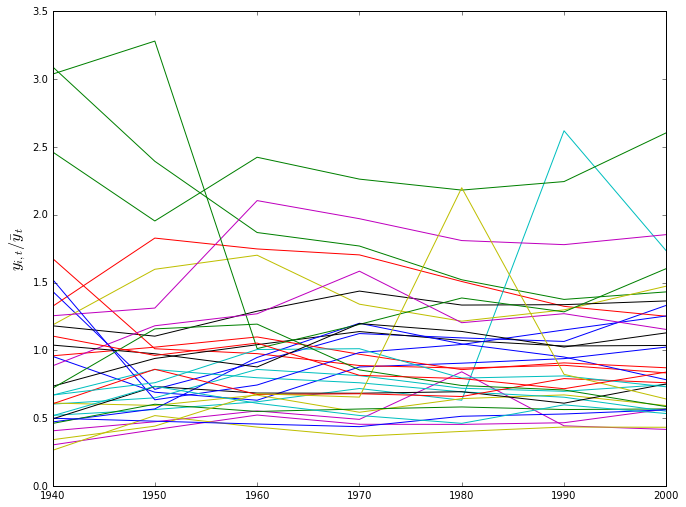

In [27]:
plot(t,r.T)
ylabel(r"$y_{i,t}/\bar{y}_t$", fontsize=16)
savefig("spaghetti.png", dpi=600)

### Figure 3

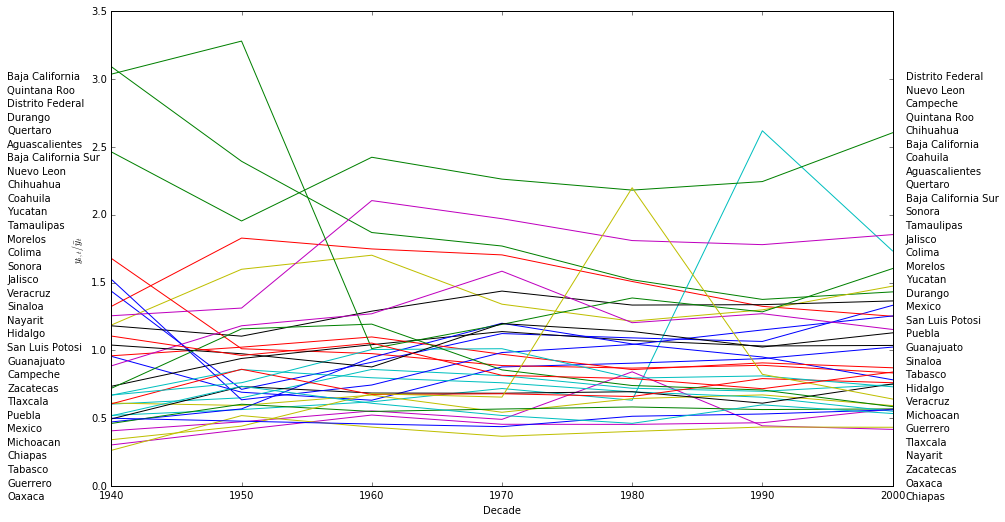

In [28]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8.5
plot(t,r.T)
names1940 = state[order1940[::-1]]
names2000 = state[order2000[::-1]]
for i in range(32):
    text(1932,3.0-(i*.10), names1940[i])
    text(2001,3.0-(i*.10), names2000[i])

ylabel(r"$y_{i,t}/\bar{y}_t$")
xlabel('Decade')
savefig("spaghetti.png", dpi=600)

## Rank changes

In [29]:
from scipy.stats import rankdata as RANK
RK1940 = RANK(r[:,0])
RK2000 = RANK(r[:,-1])
RKCHG = RK2000 - RK1940


In [30]:
RKCHG

array([ -2.,  -5.,  -3.,  20.,  -3.,   4.,   3.,   0.,   2., -13.,   1.,
         4.,  -4.,   3.,   9.,   2.,  -2., -10.,   6.,   1.,   6.,  -4.,
        -2.,   2.,  -4.,   4.,   7.,   0.,  -3.,  -8.,  -5.,  -6.])

In [31]:
state[3]

'Campeche'

In [32]:
state[9]

'Durango'

In [33]:
RKORDER = np.argsort(RKCHG)


In [34]:
RKORDER

array([ 9, 17, 29, 31,  1, 30, 24, 21, 12,  2,  4, 28, 22, 16,  0, 27,  7,
       10, 19, 23,  8, 15,  6, 13, 25, 11,  5, 18, 20, 26, 14,  3])

In [35]:
state[RKORDER]

array(['Durango', 'Nayarit', 'Veracruz', 'Zacatecas', 'Baja California',
       'Yucatan', 'Sinaloa', 'Quertaro', 'Hidalgo', 'Baja California Sur',
       'Chiapas', 'Tlaxcala', 'Quintana Roo', 'Morelos', 'Aguascalientes',
       'Tamaulipas', 'Colima', 'Guanajuato', 'Oaxaca', 'San Luis Potosi',
       'Distrito Federal', 'Michoacan', 'Coahuila', 'Jalisco', 'Sonora',
       'Guerrero', 'Chihuahua', 'Nuevo Leon', 'Puebla', 'Tabasco',
       'Mexico', 'Campeche'], 
      dtype='|S19')

In [36]:
RKCHG[RKORDER]

array([-13., -10.,  -8.,  -6.,  -5.,  -5.,  -4.,  -4.,  -4.,  -3.,  -3.,
        -3.,  -2.,  -2.,  -2.,   0.,   0.,   1.,   1.,   2.,   2.,   2.,
         3.,   3.,   4.,   4.,   4.,   6.,   6.,   7.,   9.,  20.])

## Global Tau and Spatial Autocorrelation

### Table 1

In [37]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 8.5
table = []
np.random.seed(123456)
res=[ps.SpatialTau(y[:,i],y[:,i+1],w,999) for i in range(6)]
for r in res:
    ev = r.taus.mean()
    row = [r.tau_spatial, ev, r.tau_spatial_psim]
    table.append(row)
    row ="%8.3f %8.3f %8.3f"%(r.tau_spatial, ev, r.tau_spatial_psim)
    print row

    

   0.397    0.658    0.005
   0.492    0.699    0.009
   0.651    0.763    0.047
   0.714    0.752    0.223
   0.683    0.701    0.307
   0.810    0.820    0.333


In [38]:
table = np.array(table)
mi = [ps.Moran(y[:,i], w) for i in range(7)]

In [39]:
mitable = []
for r in mi:
    mitable.append([r.I, r.EI_sim, r.p_sim])
    s = "%8.3f %8.3f %8.3f"%(r.I, r.EI_sim, r.p_sim)
    print s
    

  -0.019   -0.034    0.390
   0.035   -0.035    0.230
   0.327   -0.026    0.015
   0.561   -0.032    0.001
   0.258   -0.028    0.026
   0.213   -0.035    0.042
   0.160   -0.037    0.071


In [40]:
rows = []
mitable = np.array(mitable)
for i in range(6):
    year = str(1940 + 10 * i)        
    left = ["%8.3f"%v for v in table[i]]
    left = [year] + left
    right = [ "%8.3f"%v for v in mitable[i]]
    row = left + right
    #print row
    rows.append(row)
left = ["2000", "-", "-", "-",]
right = [ "%8.3f"%v for v in mitable[i+1]]
row = left + right
rows.append(row)
print rows
head = "Year&$\\tau_w$&$E[\\tau_w]$&p-value&$I$&$E[I]$&p-value\\\\"
head = "\\begin{tabular}{|rrrr|rrr|}\n\hline\n"+head
print head
body = []
for row in rows:
    body.append("&".join(row))
body = "\\\\\n".join(body)
print body

f = open( "taumi.tex", 'w')
f.write(head)
f.write("\n\hline\n")
f.write(body)
f.write("\\\\\n\hline\n")
f.write("\end{tabular}")
f.close()

[['1940', '   0.397', '   0.658', '   0.005', '  -0.019', '  -0.034', '   0.390'], ['1950', '   0.492', '   0.699', '   0.009', '   0.035', '  -0.035', '   0.230'], ['1960', '   0.651', '   0.763', '   0.047', '   0.327', '  -0.026', '   0.015'], ['1970', '   0.714', '   0.752', '   0.223', '   0.561', '  -0.032', '   0.001'], ['1980', '   0.683', '   0.701', '   0.307', '   0.258', '  -0.028', '   0.026'], ['1990', '   0.810', '   0.820', '   0.333', '   0.213', '  -0.035', '   0.042'], ['2000', '-', '-', '-', '   0.160', '  -0.037', '   0.071']]
\begin{tabular}{|rrrr|rrr|}
\hline
Year&$\tau_w$&$E[\tau_w]$&p-value&$I$&$E[I]$&p-value\\
1940&   0.397&   0.658&   0.005&  -0.019&  -0.034&   0.390\\
1950&   0.492&   0.699&   0.009&   0.035&  -0.035&   0.230\\
1960&   0.651&   0.763&   0.047&   0.327&  -0.026&   0.015\\
1970&   0.714&   0.752&   0.223&   0.561&  -0.032&   0.001\\
1980&   0.683&   0.701&   0.307&   0.258&  -0.028&   0.026\\
1990&   0.810&   0.820&   0.333&   0.213&  -0.035& 

In [41]:
r.EI_sim

-0.037266334855270214

In [42]:
def tauA(x, y, w):
    n = len(x)
    xx = x.reshape(n,1)
    yy = y.reshape(n,1)
    W = w.full()[0]
    C = (xx-xx.T) * (yy-yy.T)
    S = -1 * (C<0) + 1 * (C>0)
    t = S.sum()*1. / (n*(n-1))
    WS = W * S
    st = WS.sum()*1./ W.sum()
    #locals
    si = S.sum(axis=1)
    ti = si * 1./ (n-1) # local tau 
    wsi = WS.sum(axis=1) 
    sti = wsi*1./ w.cardinalities.values()
    
    return si,ti,wsi,sti,S,WS,t, st

## LISA Tau

### Table 2

In [43]:
t = tauA(y[:,0],y[:,1],w)
ti = t[1]

In [44]:
np.random.seed(12345)
lisa_tau = []
tau_i = []
moran_tau = []
for t0 in range(6):
    t1 = t0 + 1
    tau_i.append(tauA(y[:,t0],y[:,t1],w))
    lisa_tau.append(ps.Moran_Local(tau_i[t0][1],w))
    moran_tau.append(ps.Moran(tau_i[t0][1],w)) #global I on local taus
    
    

In [45]:
moran_tau

[<pysal.esda.moran.Moran instance at 0x7f1f3d132290>,
 <pysal.esda.moran.Moran instance at 0x7f1f3d4c0ea8>,
 <pysal.esda.moran.Moran instance at 0x7f1f3d416050>,
 <pysal.esda.moran.Moran instance at 0x7f1f3d4acd88>,
 <pysal.esda.moran.Moran instance at 0x7f1f3d4ac710>,
 <pysal.esda.moran.Moran instance at 0x7f1f3be8a7a0>]

In [46]:
I = [ m.I for m in moran_tau]
Ipvalue = [m.p_sim for m in moran_tau]

In [47]:
I

[0.23197424892703863,
 -0.12576832151300235,
 0.028652002256063121,
 -0.0026569498216047738,
 0.082348060568346843,
 -0.045833333333333247]

In [48]:
Ipvalue


[0.032000000000000001,
 0.255,
 0.28799999999999998,
 0.28799999999999998,
 0.13100000000000001,
 0.47399999999999998]

In [49]:
t0 = tau_i[0]


In [50]:
t0

(array([-1, 29, 25, 23, 29, 23, 21, 13, 31, 17, 23, 29, 21, 23, 25, 23, 17,
        21, 23, 23, 17, -5, 29, 19, 21, 15, 29, 19, 23, 13, 19, 19]),
 array([-0.03225806,  0.93548387,  0.80645161,  0.74193548,  0.93548387,
         0.74193548,  0.67741935,  0.41935484,  1.        ,  0.5483871 ,
         0.74193548,  0.93548387,  0.67741935,  0.74193548,  0.80645161,
         0.74193548,  0.5483871 ,  0.67741935,  0.74193548,  0.74193548,
         0.5483871 , -0.16129032,  0.93548387,  0.61290323,  0.67741935,
         0.48387097,  0.93548387,  0.61290323,  0.74193548,  0.41935484,
         0.61290323,  0.61290323]),
 array([-0.2       ,  1.        ,  1.        ,  1.        ,  0.33333333,
         0.6       ,  0.6       , -0.5       ,  1.        ,  1.        ,
         0.2       ,  0.33333333,  0.33333333,  0.5       ,  1.        ,
         1.        ,  1.        ,  0.        ,  0.6       , -0.33333333,
        -0.33333333, -0.6       ,  1.        ,  0.2       ,  0.        ,
         0.2   

In [51]:
lisa_p = np.array([l.p_sim for l in lisa_tau])
tau_is = np.array([t[1] for t in tau_i])

In [52]:
lisa_p.T

array([[ 0.027,  0.075,  0.464,  0.2  ,  0.406,  0.338],
       [ 0.456,  0.063,  0.249,  0.289,  0.253,  0.088],
       [ 0.337,  0.481,  0.108,  0.27 ,  0.365,  0.492],
       [ 0.328,  0.098,  0.011,  0.016,  0.069,  0.012],
       [ 0.12 ,  0.295,  0.063,  0.013,  0.001,  0.207],
       [ 0.42 ,  0.11 ,  0.178,  0.184,  0.25 ,  0.013],
       [ 0.391,  0.078,  0.148,  0.173,  0.19 ,  0.093],
       [ 0.364,  0.197,  0.492,  0.495,  0.428,  0.129],
       [ 0.243,  0.001,  0.151,  0.15 ,  0.424,  0.124],
       [ 0.004,  0.038,  0.481,  0.131,  0.408,  0.187],
       [ 0.003,  0.073,  0.275,  0.291,  0.404,  0.425],
       [ 0.104,  0.456,  0.091,  0.242,  0.284,  0.009],
       [ 0.263,  0.247,  0.492,  0.49 ,  0.407,  0.176],
       [ 0.355,  0.424,  0.397,  0.362,  0.367,  0.128],
       [ 0.038,  0.036,  0.001,  0.026,  0.313,  0.001],
       [ 0.042,  0.165,  0.018,  0.274,  0.33 ,  0.074],
       [ 0.378,  0.399,  0.114,  0.412,  0.47 ,  0.118],
       [ 0.397,  0.267,  0.176,

In [53]:
tau_is.T

array([[-0.03225806,  0.61290323,  0.61290323,  0.80645161,  0.74193548,
         0.80645161],
       [ 0.93548387,  0.80645161,  1.        ,  0.93548387,  0.87096774,
         0.87096774],
       [ 0.80645161,  0.87096774,  1.        ,  0.93548387,  0.80645161,
         0.74193548],
       [ 0.74193548,  0.80645161,  0.74193548,  0.67741935, -0.67741935,
         0.87096774],
       [ 0.93548387,  0.74193548,  0.93548387,  0.29032258,  0.16129032,
         0.93548387],
       [ 0.74193548,  0.87096774,  0.87096774,  0.80645161,  0.80645161,
         0.74193548],
       [ 0.67741935,  0.80645161,  0.87096774,  0.80645161,  0.74193548,
         0.87096774],
       [ 0.41935484,  0.61290323,  0.48387097,  0.74193548,  0.87096774,
         0.93548387],
       [ 1.        ,  0.87096774,  1.        ,  0.93548387,  0.87096774,
         0.93548387],
       [ 0.5483871 ,  0.80645161,  0.61290323,  0.74193548,  0.80645161,
         0.87096774],
       [ 0.74193548,  0.61290323,  0.87096774,  0.

In [54]:
## Table with local concordance values. bold for those with significant lisas


In [55]:
moran_p = [m.p_sim for m in moran_tau]
moran_I = [m.I for m in moran_tau]

In [56]:

body = []
for i in range(32):
    rt = tau_is.T[i]
    row = []
    row.append(state[i])
    for j,t in enumerate(rt):
        if lisa_p.T[i,j] < 0.05:
            v = "\\textbf{%8.2f}"%t
        else:
            v = "%8.2f"%t
        row.append(v)
    body.append("&".join(row))
header = "\\begin{tabular}{|lrrrrrr|}\n\hline\n"
header += "      &$\\tau_i$&$\\tau_i$&$\\tau_i$&$\\tau_i$&$\\tau_i$&$\\tau_i$\\\\\n"
header += "State&40-50&50-60&60-70&70-80&80-90&90-00"
header +="\\\\\n\hline\n"
footer ="\hline\n\\end{tabular}"
table = header+"\\\\\n".join(body)+"\\\\\n"+footer

In [57]:
print table

\begin{tabular}{|lrrrrrr|}
\hline
      &$\tau_i$&$\tau_i$&$\tau_i$&$\tau_i$&$\tau_i$&$\tau_i$\\
State&40-50&50-60&60-70&70-80&80-90&90-00\\
\hline
Aguascalientes&\textbf{   -0.03}&    0.61&    0.61&    0.81&    0.74&    0.81\\
Baja California&    0.94&    0.81&    1.00&    0.94&    0.87&    0.87\\
Baja California Sur&    0.81&    0.87&    1.00&    0.94&    0.81&    0.74\\
Campeche&    0.74&    0.81&\textbf{    0.74}&\textbf{    0.68}&   -0.68&\textbf{    0.87}\\
Chiapas&    0.94&    0.74&    0.94&\textbf{    0.29}&\textbf{    0.16}&    0.94\\
Chihuahua&    0.74&    0.87&    0.87&    0.81&    0.81&\textbf{    0.74}\\
Coahuila&    0.68&    0.81&    0.87&    0.81&    0.74&    0.87\\
Colima&    0.42&    0.61&    0.48&    0.74&    0.87&    0.94\\
Distrito Federal&    1.00&\textbf{    0.87}&    1.00&    0.94&    0.87&    0.94\\
Durango&\textbf{    0.55}&\textbf{    0.81}&    0.61&    0.74&    0.81&    0.87\\
Guanajuato&\textbf{    0.74}&    0.61&    0.87&    0.87&    0.81&    0.74\\
Guerrer

In [58]:
fo = open("tauilisa.tex",'w')
fo.write(table)
fo.close()

### Table 3

In [59]:
# local conditional randomization
def tauA(x, y, w):
    n = len(x)
    xx = x.reshape(n,1)
    yy = y.reshape(n,1)
    W = w.full()[0]
    C = (xx-xx.T) * (yy-yy.T)
    S = -1 * (C<0) + 1 * (C>0)
    t = S.sum()*1. / (n*(n-1))
    WS = W * S
    st = WS.sum()*1./ W.sum()
    #locals
    si = S.sum(axis=1)
    ti = si * 1./ (n-1) # local tau 
    wsi = WS.sum(axis=1) 
    sti = wsi*1./ w.cardinalities.values()
    
    return si,ti,wsi,sti,S,WS,t, st

def local_tauA(x, y, w, permutations=9):
    observed = tauA(x, y, w)
    n = len(x)
    wsi = np.zeros((n,permutations))
    si = np.zeros((n,permutations))
    pvalues = np.zeros((n,1))
    for i in xrange(n):
        yr = np.zeros_like(y)
        xr = np.zeros_like(y)
        rids = range(n)
        rids.remove(i)
        larger = 0
        obs = observed[2][i]
        for r in xrange(permutations):
            yr[i] = y[i]
            pids = np.random.permutation(rids)
            yr[rids] = y[pids]
            xr[i] = x[i]
            xr[rids] = xr[pids]
            res = tauA(xr,yr,w)
            wsi[i,r] = res[2][i]
            si[i,r] = res[0][i]
        larger = (wsi[i] >= obs).sum()
        if (permutations - larger) < larger:
            larger = permutations - larger
        pvalues[i] = (larger+1.)/(1+permutations)
    results = {}
    results['wsi'] = wsi
    results['si'] = si
    results['observed'] = observed
    results['pvalues'] = pvalues
    return results    
    #return wsi, si, observed, pvalues
            
    

In [60]:
w.transform

'R'

In [61]:
w.transform = 'B'
np.random.seed(123456)
tauI = []
for i in range(6):
    tauI.append(local_tauA(y[:,i],y[:,i+1],w,99))

In [62]:
#observed:return si,ti,wsi,sti,S,WS,t, st
tauI[0]['observed'][3]
tauI[0]['pvalues']

pvalues = np.array([ res['pvalues'] for res in tauI])
observed = np.array([ res['observed'][3] for res in tauI])

In [63]:
pvalues.shape

(6, 32, 1)

In [64]:
pvalues.shape=(6,32)
pvalues.T

array([[ 0.43,  0.42,  0.46,  0.14,  0.5 ,  0.3 ],
       [ 0.25,  0.01,  0.37,  0.47,  0.47,  0.28],
       [ 0.37,  0.28,  0.31,  0.46,  0.38,  0.23],
       [ 0.01,  0.03,  0.1 ,  0.02,  0.01,  0.28],
       [ 0.06,  0.36,  0.02,  0.49,  0.09,  0.01],
       [ 0.13,  0.14,  0.05,  0.33,  0.31,  0.02],
       [ 0.38,  0.15,  0.04,  0.31,  0.48,  0.2 ],
       [ 0.13,  0.01,  0.29,  0.38,  0.07,  0.15],
       [ 0.08,  0.01,  0.01,  0.03,  0.05,  0.01],
       [ 0.08,  0.1 ,  0.49,  0.05,  0.03,  0.06],
       [ 0.18,  0.41,  0.05,  0.01,  0.01,  0.01],
       [ 0.01,  0.02,  0.01,  0.01,  0.02,  0.01],
       [ 0.1 ,  0.03,  0.01,  0.01,  0.16,  0.14],
       [ 0.46,  0.13,  0.21,  0.15,  0.14,  0.11],
       [ 0.18,  0.5 ,  0.23,  0.39,  0.38,  0.47],
       [ 0.03,  0.02,  0.07,  0.06,  0.08,  0.01],
       [ 0.45,  0.5 ,  0.12,  0.13,  0.17,  0.09],
       [ 0.32,  0.17,  0.16,  0.02,  0.01,  0.01],
       [ 0.17,  0.01,  0.12,  0.26,  0.28,  0.23],
       [ 0.31,  0.01,  0.01,  0

In [65]:
observed.shape

(6, 32)

In [66]:
observed.T

array([[-0.2       ,  0.2       ,  0.6       ,  1.        ,  0.6       ,
         0.6       ],
       [ 1.        ,  0.6       ,  1.        ,  1.        ,  1.        ,
         0.6       ],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ],
       [ 1.        ,  0.5       ,  0.5       ,  0.5       , -1.        ,
         1.        ],
       [ 0.33333333, -0.33333333,  0.33333333,  0.33333333, -0.33333333,
         0.33333333],
       [ 0.6       ,  0.6       ,  0.2       ,  0.6       ,  1.        ,
         0.2       ],
       [ 0.6       ,  0.6       ,  0.2       ,  0.6       ,  1.        ,
         0.6       ],
       [-0.5       ,  1.        ,  0.5       ,  0.5       ,  1.        ,
         1.        ],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ],
       [ 1.        ,  1.        ,  0.2       ,  1.        ,  1.        ,
         1.        ],
       [ 0.2       ,  0.2       ,  0.6       ,  1.

In [67]:

body = []
for i in range(32):
    rt = observed.T[i]
    row = []
    row.append(state[i])
    for j,t in enumerate(rt):
        if pvalues.T[i,j] < 0.05:
            v = "\\textbf{%8.2f}"%t
        else:
            v = "%8.2f"%t
        row.append(v)
    body.append("&".join(row))
header = "\\begin{tabular}{|lrrrrrr|}\n\hline\n"
header += "      &$\\tau_{I,i}$&$\\tau_{I,i}$&$\\tau_{I,i}$&$\\tau_{I,i}$&$\\tau_{I,i}$&$\\tau_{I,i}$\\\\\n"
header += "State&40-50&50-60&60-70&70-80&80-90&90-00"
header +="\\\\\n\hline\n"
footer ="\hline\n\\end{tabular}"
table = header+"\\\\\n".join(body)+"\\\\\n"+footer

In [68]:
print table

\begin{tabular}{|lrrrrrr|}
\hline
      &$\tau_{I,i}$&$\tau_{I,i}$&$\tau_{I,i}$&$\tau_{I,i}$&$\tau_{I,i}$&$\tau_{I,i}$\\
State&40-50&50-60&60-70&70-80&80-90&90-00\\
\hline
Aguascalientes&   -0.20&    0.20&    0.60&    1.00&    0.60&    0.60\\
Baja California&    1.00&\textbf{    0.60}&    1.00&    1.00&    1.00&    0.60\\
Baja California Sur&    1.00&    1.00&    1.00&    1.00&    1.00&    1.00\\
Campeche&\textbf{    1.00}&\textbf{    0.50}&    0.50&\textbf{    0.50}&\textbf{   -1.00}&    1.00\\
Chiapas&    0.33&   -0.33&\textbf{    0.33}&    0.33&   -0.33&\textbf{    0.33}\\
Chihuahua&    0.60&    0.60&    0.20&    0.60&    1.00&\textbf{    0.20}\\
Coahuila&    0.60&    0.60&\textbf{    0.20}&    0.60&    1.00&    0.60\\
Colima&   -0.50&\textbf{    1.00}&    0.50&    0.50&    1.00&    1.00\\
Distrito Federal&    1.00&\textbf{    1.00}&\textbf{    1.00}&\textbf{    1.00}&    1.00&\textbf{    1.00}\\
Durango&    1.00&    1.00&    0.20&    1.00&\textbf{    1.00}&    1.00\\
Guanajuato&   

In [69]:
f = open('tauI.tex', 'w')
f.write(table)
f.close()

### Table 4

In [70]:
def tauA(x, y, w):
    n = len(x)
    xx = x.reshape(n,1)
    yy = y.reshape(n,1)
    W = w.full()[0]
    C = (xx-xx.T) * (yy-yy.T)
    S = -1 * (C<0) + 1 * (C>0)
    t = S.sum()*1. / (n*(n-1))
    WS = W * S
    st = WS.sum()*1./ W.sum()
    #locals
    si = S.sum(axis=1)
    ti = si * 1./ (n-1) # local tau 
    wsi = WS.sum(axis=1) 
    sti = wsi*1./ w.cardinalities.values()
    
    return si,ti,wsi,sti,S,WS,t, st

def taupp(x, y, w):
    ta = tauA(x,y,w)
    S = ta[4]
    #print S.shape
    n = len(x)
    den = n * (n-1)*1.
    t = np.zeros((n,3))
    th = np.zeros((n,2))
    h = np.zeros((n,2))
    omega = np.zeros((n,2))
    SS = S.sum()
    for i in range(n):
        
        neighbors_i = [i]
        neighbors_i.extend(w.neighbors[i])
        ni = len(neighbors_i)
        
        sh = S[neighbors_i,:][:,neighbors_i]
        
        nonneighbors = [j for j in range(n) if j not in neighbors_i]
        Sbh = S[nonneighbors,:][:, nonneighbors]
        sbh = Sbh.sum()
        omega[i,0] = (ni*(ni-1)*1.)/den
        omega[i,1] = 1 - omega[i,0]
        t[i,0] = sh.sum()*1.
        t[i,1] = ni*(ni-1)
        h[i,0] = ni
        h[i,1] = n - ni
        t[i,2] = t[i,0] / t[i,1]
        th[i,0] = sh.sum()*1. / (ni*ni-1)
        th[i,1] = sbh*1. / (h[i,1]*(h[i,1]-1))
        #print neighbors_i
        #print 's', sh.sum(), sbh, SS
        #print 'h',h[i,:]
        #print sh.sum()
        #print 'omega', omega[i]
        #print 'th', th[i]
    return t,S
    
    
# note taupp does not include comparisons of i with its nonneighbors. rather it compares the concordance between the pairs in i's neighborhood set against the concordance for pairs in its nonneighborhood set

def tauppsim(x, y, w, permutations=99):
    obs,S= taupp(x,y,w)
    n = len(x)
    den = n * (n-1)*1.
    t = np.zeros((n,3))
    th = np.zeros((n,2))
    h = np.zeros((n,2))
    omega = np.zeros((n,2))
    SS = S.sum()
    pvalues = np.zeros((n,1))
    for i in range(n):
        ids_i = [j for j in range(n) if j!=i]
        larger = 0
        for perm in xrange(permutations):
            np.random.shuffle(ids_i)
            neighbors_i = [i]
            neighbors_i.extend(ids_i[:len(w.neighbors[i])])
            #print i,neighbors_i
            ni = len(neighbors_i)

            sh = S[neighbors_i,:][:,neighbors_i]

            nonneighbors = [j for j in range(n) if j not in neighbors_i]
            Sbh = S[nonneighbors,:][:, nonneighbors]
            sbh = Sbh.sum()
            omega[i,0] = (ni*(ni-1)*1.)/den
            omega[i,1] = 1 - omega[i,0]
            t[i,0] = sh.sum()*1.
            t[i,1] = ni*(ni-1)
            h[i,0] = ni
            h[i,1] = n - ni
            t[i,2] = t[i,0] / t[i,1]
            if t[i,2] >= obs[i,2]:
                larger += 1
        if (permutations - larger) < larger:
            larger = permutations - larger
        pvalues[i] = (larger+1.)/(1+permutations)
      
    #r = np.hstack((obs,pvalues))
    r = (obs[:,2],pvalues)
    results = {}
    results['tau_h'] = obs[:,2]
    
    results['pvalues'] = pvalues.flatten()
    return results
           
    

In [71]:
w.neighbors[0]

[9, 10, 21, 23, 31]

In [72]:
t=taupp(y[:,0],y[:,1],w)


In [73]:
tsim = tauppsim(y[:,0],y[:,1],w)

In [74]:
tsim

{'pvalues': array([ 0.08,  0.13,  0.05,  0.42,  0.05,  0.26,  0.34,  0.06,  0.01,
         0.03,  0.01,  0.05,  0.06,  0.09,  0.14,  0.05,  0.14,  0.04,
         0.26,  0.02,  0.13,  0.08,  0.34,  0.05,  0.04,  0.34,  0.38,
         0.32,  0.07,  0.35,  0.5 ,  0.03]),
 'tau_h': array([ 0.06666667,  0.6       ,  0.2       ,  0.8       ,  0.33333333,
         0.6       ,  0.6       ,  0.2       ,  1.        ,  0.06666667,
         0.06666667,  0.33333333,  0.33333333,  0.2       ,  1.        ,
         0.33333333,  0.33333333,  0.2       ,  0.6       ,  0.33333333,
         0.33333333,  0.06666667,  0.8       ,  0.06666667,  0.2       ,
         0.6       ,  0.8       ,  0.6       ,  0.33333333,  0.8       ,
         0.8       ,  0.06666667])}

In [75]:
np.random.seed(12345)
tauII = []
for i in range(6):
    tauII.append(tauppsim(y[:,i], y[:,i+1],w))
    

In [76]:
pvalues = np.array([res['pvalues'] for res in tauII])
tau2 = np.array([res['tau_h'] for res in tauII])

In [77]:
tau2

array([[ 0.06666667,  0.6       ,  0.2       ,  0.8       ,  0.33333333,
         0.6       ,  0.6       ,  0.2       ,  1.        ,  0.06666667,
         0.06666667,  0.33333333,  0.33333333,  0.2       ,  1.        ,
         0.33333333,  0.33333333,  0.2       ,  0.6       ,  0.33333333,
         0.33333333,  0.06666667,  0.8       ,  0.06666667,  0.2       ,
         0.6       ,  0.8       ,  0.6       ,  0.33333333,  0.8       ,
         0.8       ,  0.06666667],
       [ 0.2       ,  0.6       ,  0.8       ,  0.4       ,  0.        ,
         0.6       ,  0.6       ,  0.8       ,  1.        ,  0.2       ,
         0.2       ,  0.        ,  1.        ,  0.8       ,  1.        ,
         0.        ,  1.        ,  0.8       ,  0.6       ,  0.        ,
         1.        ,  0.2       ,  0.4       ,  0.2       ,  0.8       ,
         0.6       ,  0.4       ,  0.6       ,  1.        ,  0.4       ,
         0.4       ,  0.2       ],
       [ 0.6       ,  0.6       ,  0.8       ,  0.4   

In [78]:
body = []
for i in range(32):
    rt = tau2.T[i]
    row = []
    row.append(state[i])
    for j,t in enumerate(rt):
        if pvalues.T[i,j] < 0.05:
            v = "\\textbf{%8.2f}"%t
        else:
            v = "%8.2f"%t
        row.append(v)
    body.append("&".join(row))
header = "\\begin{tabular}{|lrrrrrr|}\n\hline\n"
header += "      &$\\tau_{II,i}$&$\\tau_{II,i}$&$\\tau_{II,i}$&$\\tau_{II,i}$&$\\tau_{II,i}$&$\\tau_{II,i}$\\\\\n"
header += "State&40-50&50-60&60-70&70-80&80-90&90-00"
header +="\\\\\n\hline\n"
footer ="\hline\n\\end{tabular}"
table = header+"\\\\\n".join(body)+"\\\\\n"+footer

In [79]:
print table

\begin{tabular}{|lrrrrrr|}
\hline
      &$\tau_{II,i}$&$\tau_{II,i}$&$\tau_{II,i}$&$\tau_{II,i}$&$\tau_{II,i}$&$\tau_{II,i}$\\
State&40-50&50-60&60-70&70-80&80-90&90-00\\
\hline
Aguascalientes&\textbf{    0.07}&\textbf{    0.20}&    0.60&    1.00&    0.73&    0.87\\
Baja California&    0.60&    0.60&    0.60&    0.73&    1.00&    0.73\\
Baja California Sur&\textbf{    0.20}&    0.80&    0.80&    0.80&    1.00&    1.00\\
Campeche&    0.80&\textbf{    0.40}&\textbf{    0.40}&\textbf{    0.00}&    0.00&    0.80\\
Chiapas&\textbf{    0.33}&\textbf{    0.00}&    0.67&    0.67&    0.33&\textbf{    0.67}\\
Chihuahua&    0.60&    0.60&\textbf{    0.60}&    0.73&    1.00&    0.73\\
Coahuila&    0.60&    0.60&    0.60&    0.73&    1.00&    0.73\\
Colima&    0.20&    0.80&    0.80&    0.80&    1.00&    1.00\\
Distrito Federal&\textbf{    1.00}&    1.00&\textbf{    1.00}&\textbf{    1.00}&    1.00&\textbf{    1.00}\\
Durango&\textbf{    0.07}&\textbf{    0.20}&    0.60&    1.00&    0.73&    0.87\\

In [80]:
f = open("tauII.tex", 'w')
f.write(table)
f.close()

## Interregional Concordance Decomposition

### Table 5

In [81]:
w = ps.block_weights(np.array(regime).flatten())
W = w.full()[0]
n = w.n
WH = np.ones((n,n)) - np.eye(n) - W

In [82]:

regime = regime - 1

In [83]:
reg = np.array(regime).flatten()
P = np.zeros((7,n))
for r, p in enumerate(reg):
    P[p,r] = 1
  

/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [84]:
reg

array([ 2.,  4.,  5.,  3.,  6.,  4.,  4.,  5.,  0.,  2.,  2.,  6.,  1.,
        5.,  0.,  6.,  1.,  5.,  4.,  6.,  1.,  2.,  3.,  2.,  5.,  4.,
        3.,  4.,  1.,  3.,  3.,  2.])

In [85]:
P

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         1.,  0.,  0.,  1.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
  

In [86]:

x = income[:,0]
y = income[:,1]
d0 = x[np.newaxis,:] - x[:,np.newaxis]
d1 = y[np.newaxis,:] - y[:,np.newaxis]
S = d0 * d1
S = 1 * (S>0)  + -1 * (S <0)
WS = W*S
WHS = WH*S
PWSPt = np.dot(P,np.dot(WS,P.T))
PWHSPt = np.dot(P,np.dot(WHS,P.T))
D = np.dot(P,np.dot(W,P.T)) + np.dot(P,np.dot(WH,P.T))
IR = np.dot(P,np.dot(S,P.T))
IRD = IR/D

In [87]:
IRD

array([[ 1.        ,  0.75      ,  1.        ,  0.8       ,  1.        ,
         1.        ,  0.75      ],
       [ 0.75      ,  0.33333333,  0.25      ,  0.7       ,  0.83333333,
         0.9       ,  0.625     ],
       [ 1.        ,  0.25      ,  0.06666667,  0.6       ,  0.22222222,
         0.06666667,  1.        ],
       [ 0.8       ,  0.7       ,  0.6       ,  0.8       ,  0.66666667,
         0.84      ,  0.8       ],
       [ 1.        ,  0.83333333,  0.22222222,  0.66666667,  0.6       ,
         0.93333333,  1.        ],
       [ 1.        ,  0.9       ,  0.06666667,  0.84      ,  0.93333333,
         0.2       ,  1.        ],
       [ 0.75      ,  0.625     ,  1.        ,  0.8       ,  1.        ,
         1.        ,  0.33333333]])

In [88]:
PWSPt/D

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.33333333,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.06666667,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.8       ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.6       ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.2       ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.33333333]])

In [89]:
PWHSPt/D

array([[ 0.        ,  0.75      ,  1.        ,  0.8       ,  1.        ,
         1.        ,  0.75      ],
       [ 0.75      ,  0.        ,  0.25      ,  0.7       ,  0.83333333,
         0.9       ,  0.625     ],
       [ 1.        ,  0.25      ,  0.        ,  0.6       ,  0.22222222,
         0.06666667,  1.        ],
       [ 0.8       ,  0.7       ,  0.6       ,  0.        ,  0.66666667,
         0.84      ,  0.8       ],
       [ 1.        ,  0.83333333,  0.22222222,  0.66666667,  0.        ,
         0.93333333,  1.        ],
       [ 1.        ,  0.9       ,  0.06666667,  0.84      ,  0.93333333,
         0.        ,  1.        ],
       [ 0.75      ,  0.625     ,  1.        ,  0.8       ,  1.        ,
         1.        ,  0.        ]])

In [90]:
PWHSPt

array([[  0.,   6.,  12.,   8.,  12.,  10.,   6.],
       [  6.,   0.,   6.,  14.,  20.,  18.,  10.],
       [ 12.,   6.,   0.,  18.,   8.,   2.,  24.],
       [  8.,  14.,  18.,   0.,  20.,  21.,  16.],
       [ 12.,  20.,   8.,  20.,   0.,  28.,  24.],
       [ 10.,  18.,   2.,  21.,  28.,   0.,  20.],
       [  6.,  10.,  24.,  16.,  24.,  20.,   0.]])

In [91]:
def tauR(x, y, regime, permutations=99):
    """
    regime: 0-offset regime id variable
    """
    reg = np.array(regime).flatten()
    ur = np.unique(reg)
    P = np.zeros((len(ur),n))
    for r, p in enumerate(reg):
        P[p,r] = 1
    
    def _calc(x0,y0,P):
        d0 = x0[np.newaxis,:] - x0[:,np.newaxis]
        d1 = y0[np.newaxis,:] - y0[:,np.newaxis]
        S = d0 * d1
        S = 1 * (S>0)  + -1 * (S <0)
        WS = W*S
        WHS = WH*S
        PWSPt = np.dot(P,np.dot(WS,P.T))
        PWHSPt = np.dot(P,np.dot(WHS,P.T))
        D = np.dot(P,np.dot(W,P.T)) + np.dot(P,np.dot(WH,P.T))
        IR = np.dot(P,np.dot(S,P.T))
        IRD = IR/D
        return IRD
    original = _calc(x,y,P)
    if permutations:
        k = len(ur)
        larger = np.zeros((k,k))
        rids = np.arange(len(x))
        for permutation in xrange(permutations):
            np.random.shuffle(rids)
            res = _calc(x[rids],y[rids],P)
            larger += np.greater_equal(res, original)
        m = np.less(permutations - larger, larger)
        pvalues = (1 + m * (permutations-larger) + (1-m) * larger) / (1. + permutations)
    return original, pvalues, larger, m
    

In [92]:
np.set_printoptions(precision=4)
np.random.seed(12345)
r = tauR(x,y, regime)
regime

/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


array([ 2.,  4.,  5.,  3.,  6.,  4.,  4.,  5.,  0.,  2.,  2.,  6.,  1.,
        5.,  0.,  6.,  1.,  5.,  4.,  6.,  1.,  2.,  3.,  2.,  5.,  4.,
        3.,  4.,  1.,  3.,  3.,  2.])

In [93]:
r

(array([[ 1.    ,  0.75  ,  1.    ,  0.8   ,  1.    ,  1.    ,  0.75  ],
        [ 0.75  ,  0.3333,  0.25  ,  0.7   ,  0.8333,  0.9   ,  0.625 ],
        [ 1.    ,  0.25  ,  0.0667,  0.6   ,  0.2222,  0.0667,  1.    ],
        [ 0.8   ,  0.7   ,  0.6   ,  0.8   ,  0.6667,  0.84  ,  0.8   ],
        [ 1.    ,  0.8333,  0.2222,  0.6667,  0.6   ,  0.9333,  1.    ],
        [ 1.    ,  0.9   ,  0.0667,  0.84  ,  0.9333,  0.2   ,  1.    ],
        [ 0.75  ,  0.625 ,  1.    ,  0.8   ,  1.    ,  1.    ,  0.3333]]),
 array([[ 0.23,  0.46,  0.14,  0.46,  0.17,  0.23,  0.39],
        [ 0.46,  0.1 ,  0.04,  0.48,  0.32,  0.23,  0.26],
        [ 0.14,  0.04,  0.03,  0.26,  0.02,  0.01,  0.03],
        [ 0.46,  0.48,  0.26,  0.42,  0.37,  0.24,  0.42],
        [ 0.17,  0.32,  0.02,  0.37,  0.3 ,  0.01,  0.01],
        [ 0.23,  0.23,  0.01,  0.24,  0.01,  0.05,  0.04],
        [ 0.39,  0.26,  0.03,  0.42,  0.01,  0.04,  0.09]]),
 array([[ 77.,  54.,  13.,  45.,  16.,  22.,  61.],
        [ 54.,  90.,

In [94]:
np.random.seed(123456)
np.set_printoptions(precision=3)
r = tauR(income[:,0],income[:,-1], regime)
regime

/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


array([ 2.,  4.,  5.,  3.,  6.,  4.,  4.,  5.,  0.,  2.,  2.,  6.,  1.,
        5.,  0.,  6.,  1.,  5.,  4.,  6.,  1.,  2.,  3.,  2.,  5.,  4.,
        3.,  4.,  1.,  3.,  3.,  2.])

In [95]:
r

(array([[ 1.   ,  0.25 ,  0.5  ,  0.6  ,  0.833,  0.6  ,  1.   ],
        [ 0.25 ,  0.333,  0.5  ,  0.3  ,  0.917,  0.4  ,  0.75 ],
        [ 0.5  ,  0.5  ,  0.6  ,  0.4  ,  0.389,  0.533,  0.833],
        [ 0.6  ,  0.3  ,  0.4  ,  0.2  ,  0.4  ,  0.28 ,  0.8  ],
        [ 0.833,  0.917,  0.389,  0.4  ,  0.6  ,  0.733,  1.   ],
        [ 0.6  ,  0.4  ,  0.533,  0.28 ,  0.733,  0.8  ,  0.8  ],
        [ 1.   ,  0.75 ,  0.833,  0.8  ,  1.   ,  0.8  ,  0.333]]),
 array([[ 0.25,  0.1 ,  0.22,  0.43,  0.2 ,  0.42,  0.15],
        [ 0.1 ,  0.07,  0.25,  0.04,  0.02,  0.14,  0.36],
        [ 0.22,  0.25,  0.38,  0.12,  0.05,  0.3 ,  0.16],
        [ 0.43,  0.04,  0.12,  0.04,  0.08,  0.07,  0.31],
        [ 0.2 ,  0.02,  0.05,  0.08,  0.42,  0.21,  0.03],
        [ 0.42,  0.14,  0.3 ,  0.07,  0.21,  0.39,  0.26],
        [ 0.15,  0.36,  0.16,  0.31,  0.03,  0.26,  0.13]]),
 array([[ 75.,  90.,  78.,  57.,  19.,  58.,  14.],
        [ 90.,  93.,  75.,  96.,   1.,  86.,  35.],
        [ 78.,  7

In [96]:
state

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Chiapas', 'Chihuahua', 'Coahuila', 'Colima',
       'Distrito Federal', 'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo',
       'Jalisco', 'Mexico', 'Michoacan', 'Morelos', 'Nayarit',
       'Nuevo Leon', 'Oaxaca', 'Puebla', 'Quertaro', 'Quintana Roo',
       'San Luis Potosi', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas',
       'Tlaxcala', 'Veracruz', 'Yucatan', 'Zacatecas'], 
      dtype='|S19')

In [97]:
for reg in np.unique(regime):
    print reg
    print state[regime==reg]

0.0
['Distrito Federal' 'Mexico']
1.0
['Hidalgo' 'Morelos' 'Puebla' 'Tlaxcala']
2.0
['Aguascalientes' 'Durango' 'Guanajuato' 'Quertaro' 'San Luis Potosi'
 'Zacatecas']
3.0
['Campeche' 'Quintana Roo' 'Tabasco' 'Veracruz' 'Yucatan']
4.0
['Baja California' 'Chihuahua' 'Coahuila' 'Nuevo Leon' 'Sonora'
 'Tamaulipas']
5.0
['Baja California Sur' 'Colima' 'Jalisco' 'Nayarit' 'Sinaloa']
6.0
['Chiapas' 'Guerrero' 'Michoacan' 'Oaxaca']


In [98]:
region_names = ["Capital", "Center", "Center-N", "Gulf", "North", "Pacific", "South"]

In [99]:
rt,rp, larger, m = r

In [100]:
rt

array([[ 1.   ,  0.25 ,  0.5  ,  0.6  ,  0.833,  0.6  ,  1.   ],
       [ 0.25 ,  0.333,  0.5  ,  0.3  ,  0.917,  0.4  ,  0.75 ],
       [ 0.5  ,  0.5  ,  0.6  ,  0.4  ,  0.389,  0.533,  0.833],
       [ 0.6  ,  0.3  ,  0.4  ,  0.2  ,  0.4  ,  0.28 ,  0.8  ],
       [ 0.833,  0.917,  0.389,  0.4  ,  0.6  ,  0.733,  1.   ],
       [ 0.6  ,  0.4  ,  0.533,  0.28 ,  0.733,  0.8  ,  0.8  ],
       [ 1.   ,  0.75 ,  0.833,  0.8  ,  1.   ,  0.8  ,  0.333]])

In [101]:
rp

array([[ 0.25,  0.1 ,  0.22,  0.43,  0.2 ,  0.42,  0.15],
       [ 0.1 ,  0.07,  0.25,  0.04,  0.02,  0.14,  0.36],
       [ 0.22,  0.25,  0.38,  0.12,  0.05,  0.3 ,  0.16],
       [ 0.43,  0.04,  0.12,  0.04,  0.08,  0.07,  0.31],
       [ 0.2 ,  0.02,  0.05,  0.08,  0.42,  0.21,  0.03],
       [ 0.42,  0.14,  0.3 ,  0.07,  0.21,  0.39,  0.26],
       [ 0.15,  0.36,  0.16,  0.31,  0.03,  0.26,  0.13]])

In [102]:
larger

array([[ 75.,  90.,  78.,  57.,  19.,  58.,  14.],
       [ 90.,  93.,  75.,  96.,   1.,  86.,  35.],
       [ 78.,  75.,  62.,  88.,  95.,  70.,  15.],
       [ 57.,  96.,  88.,  96.,  92.,  93.,  30.],
       [ 19.,   1.,  95.,  92.,  58.,  20.,   2.],
       [ 58.,  86.,  70.,  93.,  20.,  38.,  25.],
       [ 14.,  35.,  15.,  30.,   2.,  25.,  87.]])

In [103]:
mob = (rt-1)/2. * -1
mob

array([[-0.   ,  0.375,  0.25 ,  0.2  ,  0.083,  0.2  , -0.   ],
       [ 0.375,  0.333,  0.25 ,  0.35 ,  0.042,  0.3  ,  0.125],
       [ 0.25 ,  0.25 ,  0.2  ,  0.3  ,  0.306,  0.233,  0.083],
       [ 0.2  ,  0.35 ,  0.3  ,  0.4  ,  0.3  ,  0.36 ,  0.1  ],
       [ 0.083,  0.042,  0.306,  0.3  ,  0.2  ,  0.133, -0.   ],
       [ 0.2  ,  0.3  ,  0.233,  0.36 ,  0.133,  0.1  ,  0.1  ],
       [-0.   ,  0.125,  0.083,  0.1  , -0.   ,  0.1  ,  0.333]])

In [104]:

body = []
for i, row in enumerate(rt):
    rowi = [region_names[i]]
    for j, rij in enumerate(row):
        #print i,j, rij, rp[i,j]
        sig = 0
        if rp[i,j] <= 0.05:
            v = "\\textbf{%8.2f}"%rij
            sig = 1
        else:
            v = "%8.2f"%rij
       
                
            
        rowi.append(v)
        #print rowi
        
    body.append("&".join(rowi))
header = "&"+"&".join(region_names)


main = "\\\\\n".join(body)
header = "\\begin{tabular}{|lrrrrrrr|}\n\\hline\n"
header += "&" + "&".join([name for name in region_names])
header += "\\\\\n\hline\n"

table = header+main
table += "\\\\\n\hline\n"
table += "\\end{tabular}"
print table

\begin{tabular}{|lrrrrrrr|}
\hline
&Capital&Center&Center-N&Gulf&North&Pacific&South\\
\hline
Capital&    1.00&    0.25&    0.50&    0.60&    0.83&    0.60&    1.00\\
Center&    0.25&    0.33&    0.50&\textbf{    0.30}&\textbf{    0.92}&    0.40&    0.75\\
Center-N&    0.50&    0.50&    0.60&    0.40&\textbf{    0.39}&    0.53&    0.83\\
Gulf&    0.60&\textbf{    0.30}&    0.40&\textbf{    0.20}&    0.40&    0.28&    0.80\\
North&    0.83&\textbf{    0.92}&\textbf{    0.39}&    0.40&    0.60&    0.73&\textbf{    1.00}\\
Pacific&    0.60&    0.40&    0.53&    0.28&    0.73&    0.80&    0.80\\
South&    1.00&    0.75&    0.83&    0.80&\textbf{    1.00}&    0.80&    0.33\\
\hline
\end{tabular}


In [105]:
with open("inter.tex", 'w') as outfile:
    outfile.write(table)